# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/master_data_by_category.csv"
df = pd.read_csv(data_path)

In [3]:
print(df.columns.tolist())
print(df.head())

['Country', 'category', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
   Country       category  2013  2014  2015  2016  2017  2018  2019  2020  \
0    China  Corporate Tax  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0   
1   France  Corporate Tax  38.0  38.0  38.0  34.4  44.4  34.4  34.4  32.0   
2  Germany  Corporate Tax  29.6  29.7  29.8  29.8  29.9  29.9  29.9  29.8   
3    Japan  Corporate Tax  37.0  34.6  32.1  30.0  30.0  29.7  29.7  29.7   
4    Korea  Corporate Tax  24.2  24.2  24.2  24.2  24.2  27.5  27.5  27.5   

   2021  2022  
0  25.0  25.0  
1  28.4  25.8  
2  29.9  29.9  
3  29.7  29.7  
4  27.5  27.5  


In [4]:
years = [str(year) for year in range(2013, 2023)]

In [5]:
print(df[years].describe())

               2013          2014          2015          2016          2017  \
count  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02   
mean   3.368504e+11  3.520391e+11  3.496947e+11  3.590386e+11  3.770525e+11   
std    1.836277e+12  1.925947e+12  1.979543e+12  2.033135e+12  2.141520e+12   
min    1.621000e+00  2.022400e+00  2.057000e+00  2.100300e+00  2.116000e+00   
25%    3.775625e+01  3.771050e+01  3.801300e+01  3.861350e+01  3.862100e+01   
50%    5.390000e+01  5.560000e+01  5.590000e+01  5.680000e+01  5.695000e+01   
75%    8.682500e+01  8.721760e+01  8.751735e+01  8.747500e+01  8.815000e+01   
max    1.688070e+13  1.760810e+13  1.829500e+13  1.880490e+13  1.961210e+13   

               2018          2019          2020          2021          2022  
count  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02  1.260000e+02  
mean   4.049411e+11  4.136573e+11  4.129091e+11  4.667683e+11  4.753410e+11  
std    2.297627e+12  2.377317e+12  2.380446e+12  2.708

In [6]:
missing_counts = df.isnull().sum()
print("전체 데이터셋 결측치 개수:")
print(missing_counts)

전체 데이터셋 결측치 개수:
Country     0
category    0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
2022        0
dtype: int64


In [7]:
print("Data shape:", df.shape)
print(df.head())

Data shape: (126, 12)
   Country       category  2013  2014  2015  2016  2017  2018  2019  2020  \
0    China  Corporate Tax  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0   
1   France  Corporate Tax  38.0  38.0  38.0  34.4  44.4  34.4  34.4  32.0   
2  Germany  Corporate Tax  29.6  29.7  29.8  29.8  29.9  29.9  29.9  29.8   
3    Japan  Corporate Tax  37.0  34.6  32.1  30.0  30.0  29.7  29.7  29.7   
4    Korea  Corporate Tax  24.2  24.2  24.2  24.2  24.2  27.5  27.5  27.5   

   2021  2022  
0  25.0  25.0  
1  28.4  25.8  
2  29.9  29.9  
3  29.7  29.7  
4  27.5  27.5  


In [8]:
categories = df['category'].unique()
categories

array(['Corporate Tax', 'GERD', 'Institutions',
       'Human capital and research', 'Infrastructure',
       'Market sophistication', 'Business sophistication',
       'Knowledge and technology outputs', 'Creative outputs',
       'Global Innovation Index', 'GNI_per_capita', 'GDP_per_capita_PPP',
       'Patent Publications', 'WIPO Tax', 'GDP', 'General Revenue',
       'Internet Usage', 'Unemployment Rate'], dtype=object)

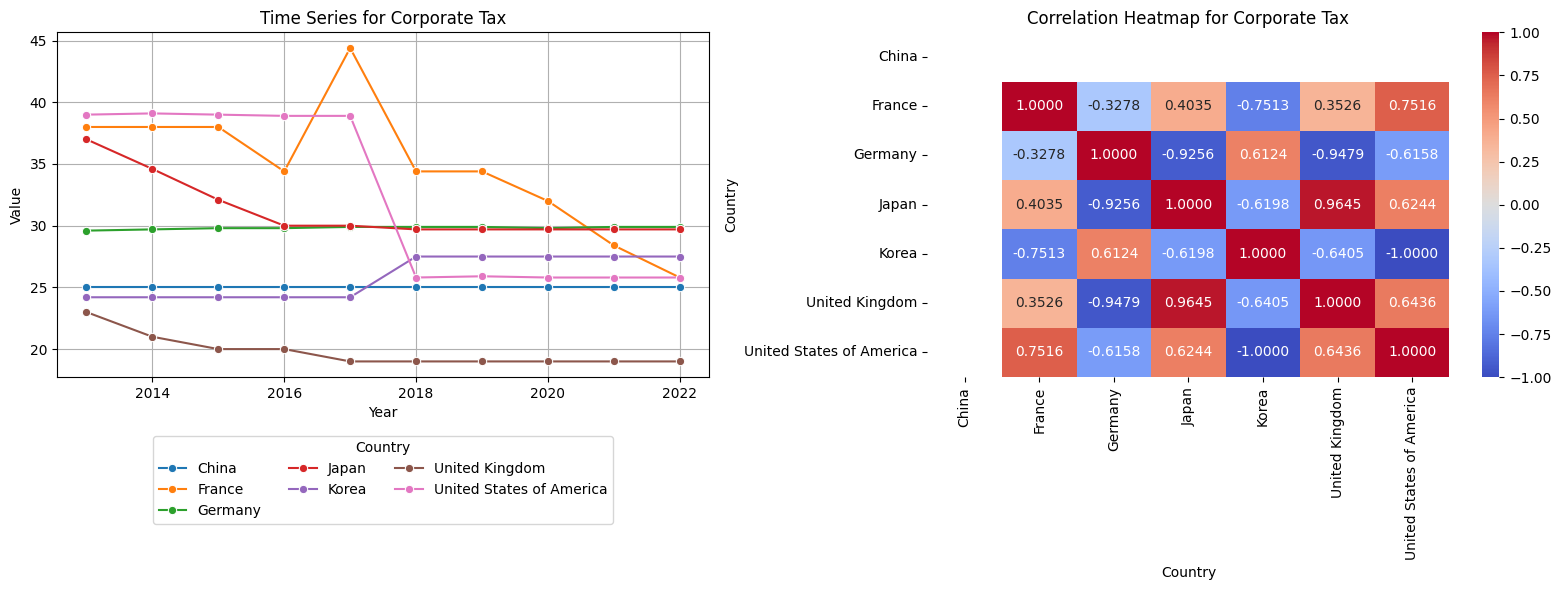

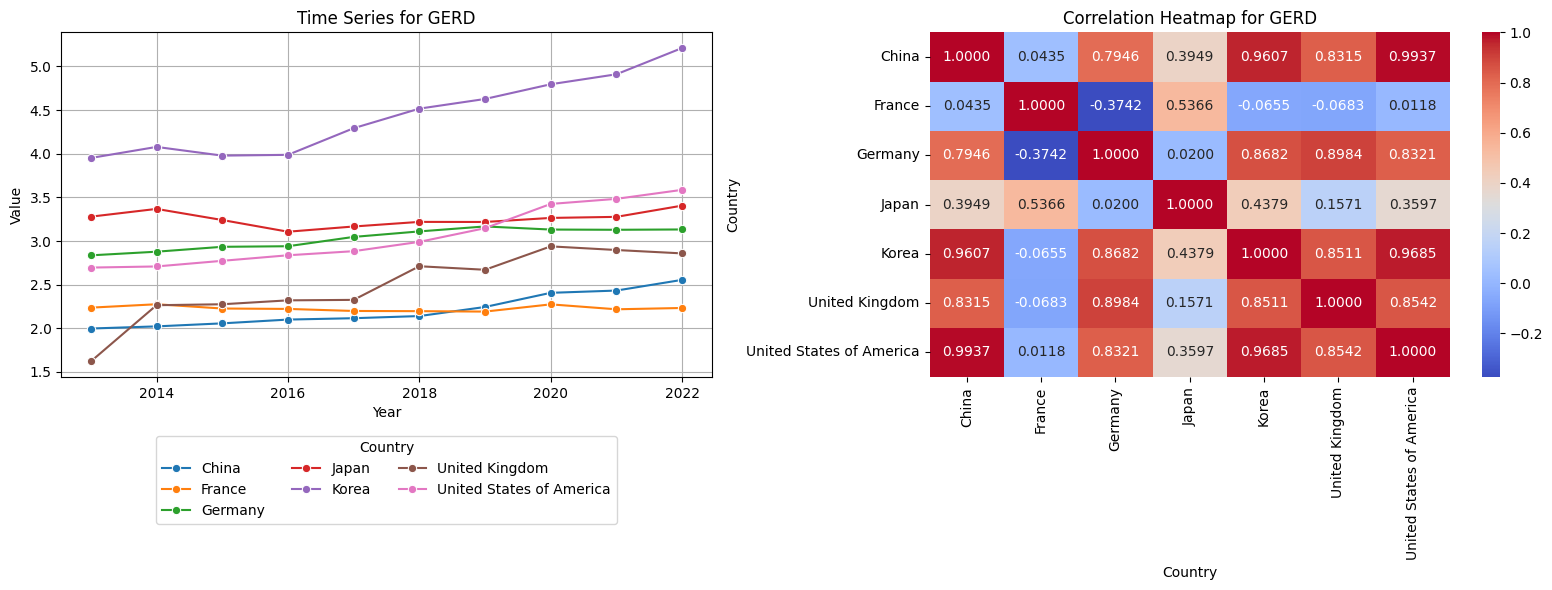

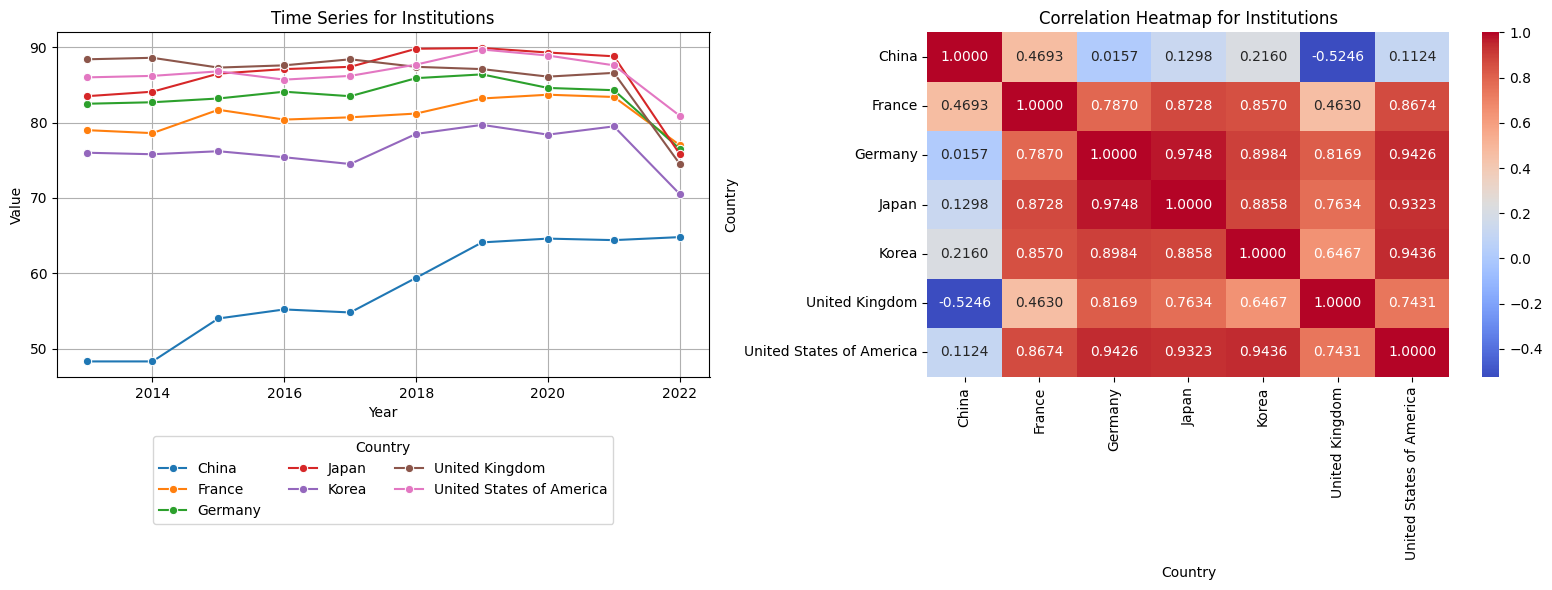

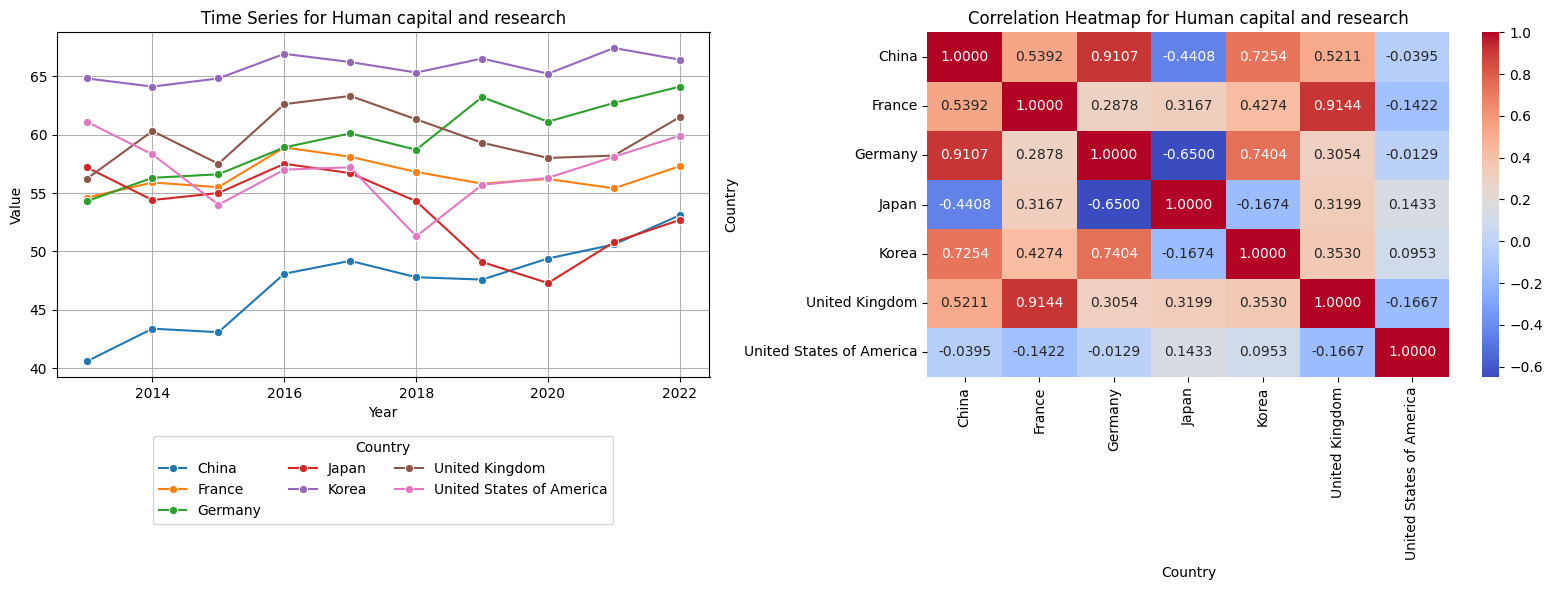

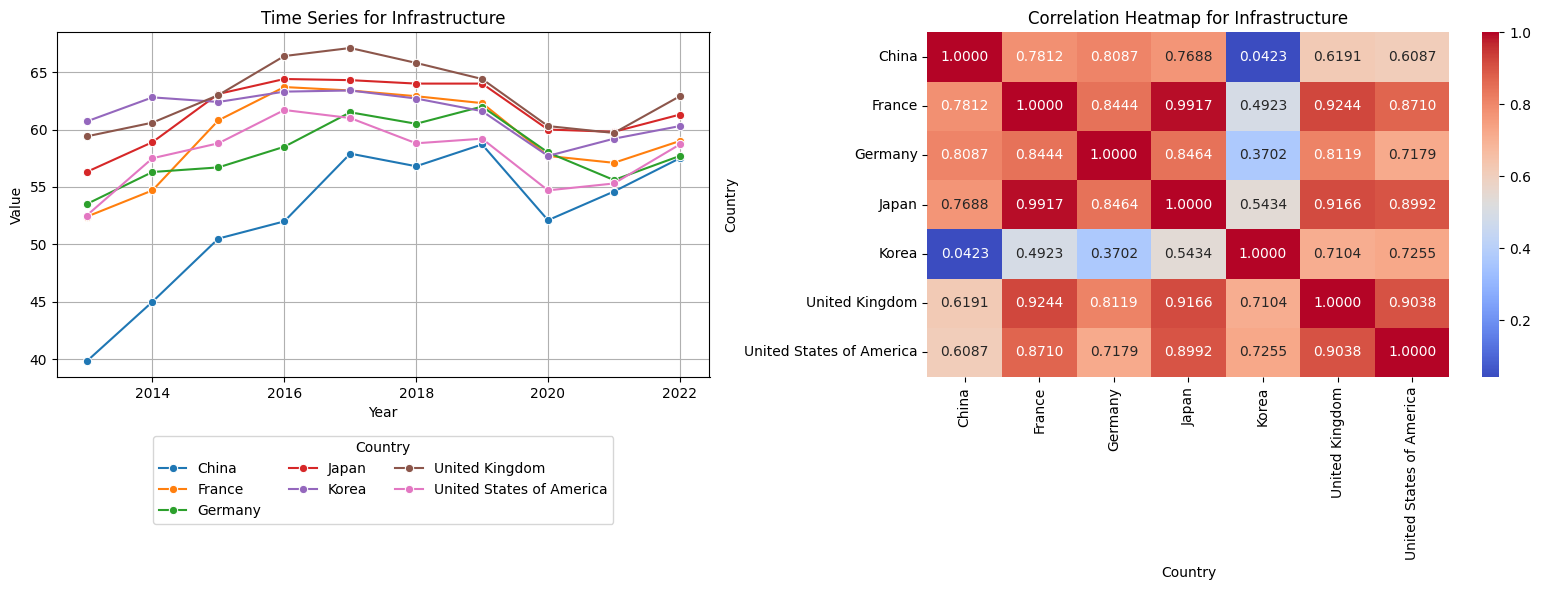

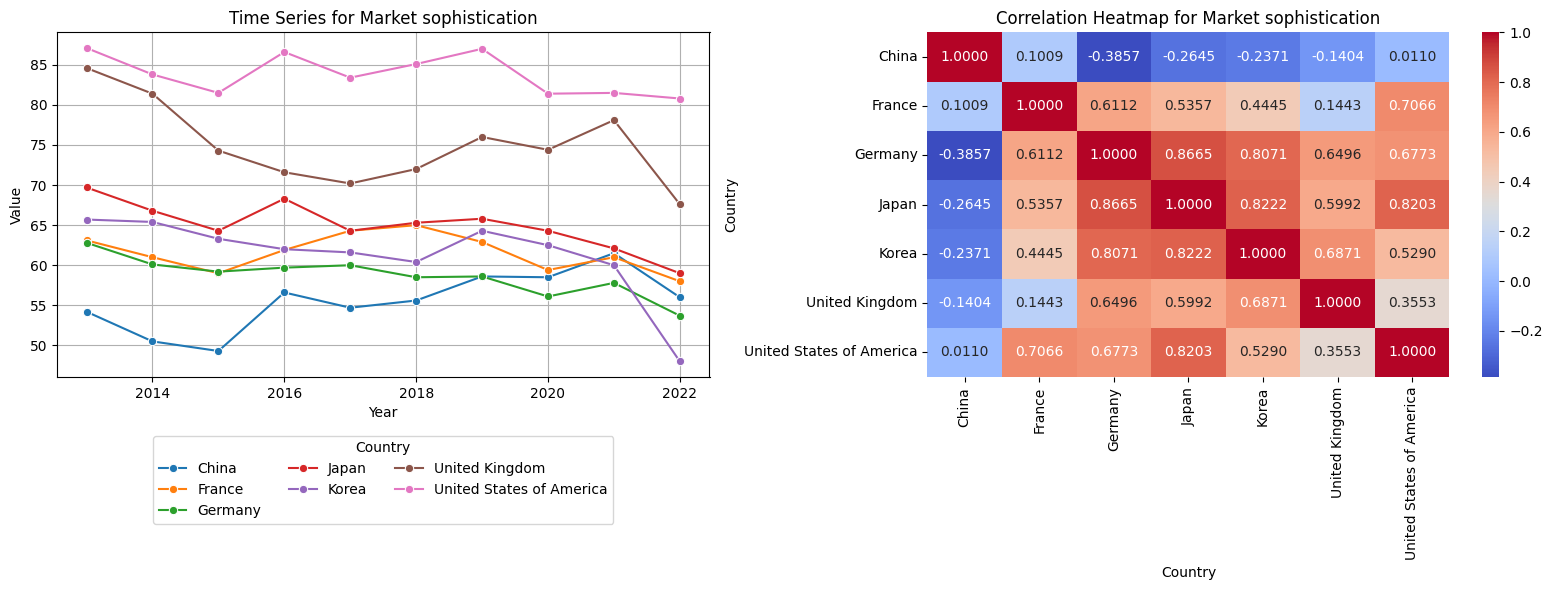

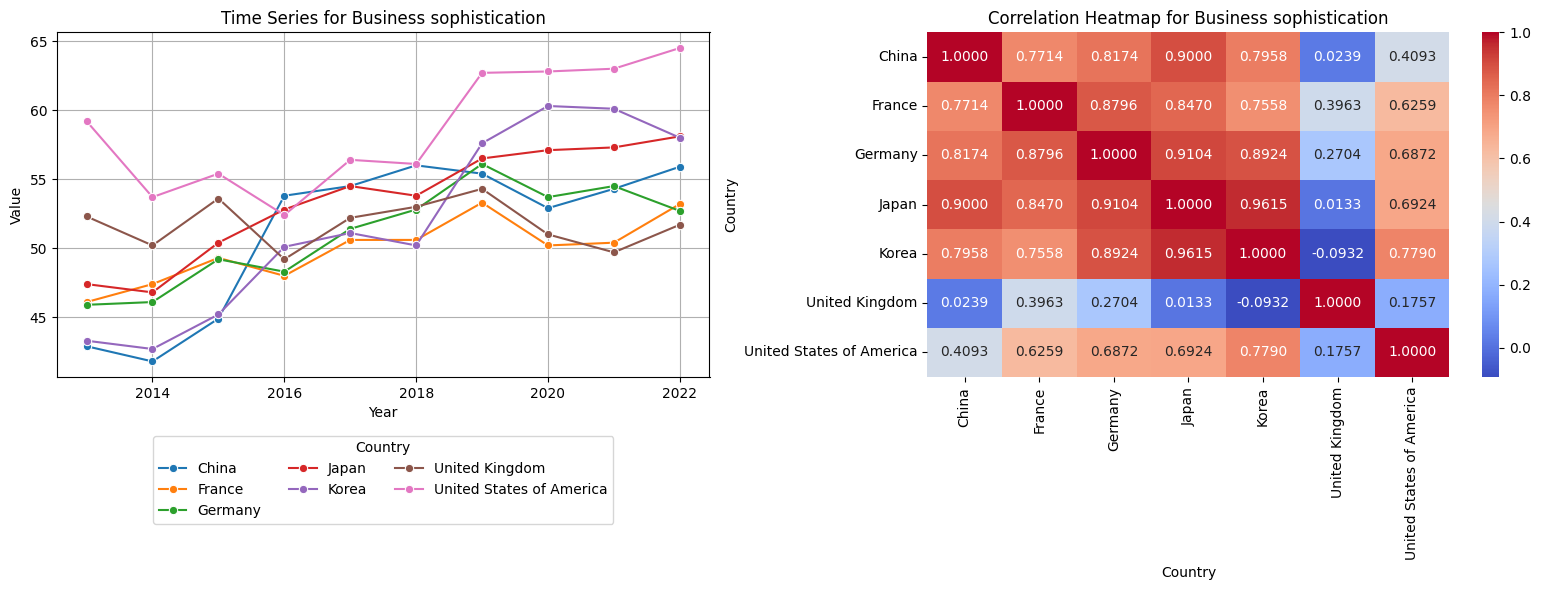

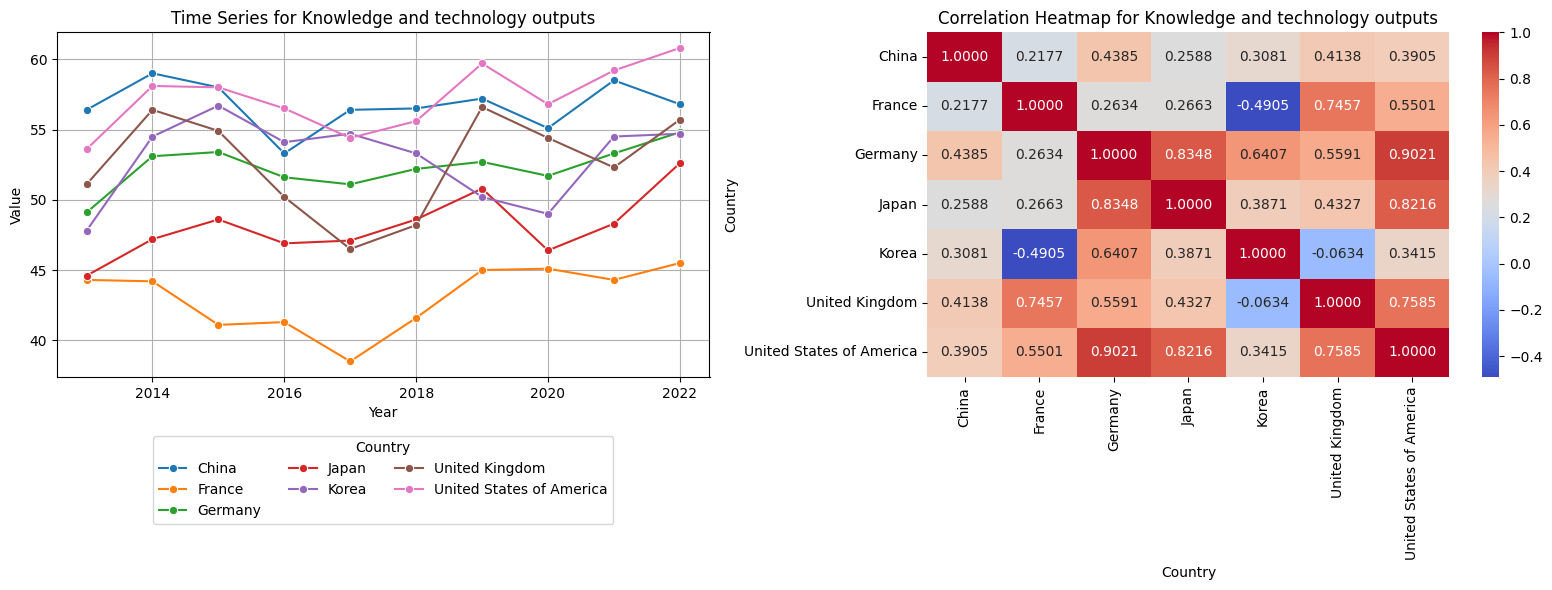

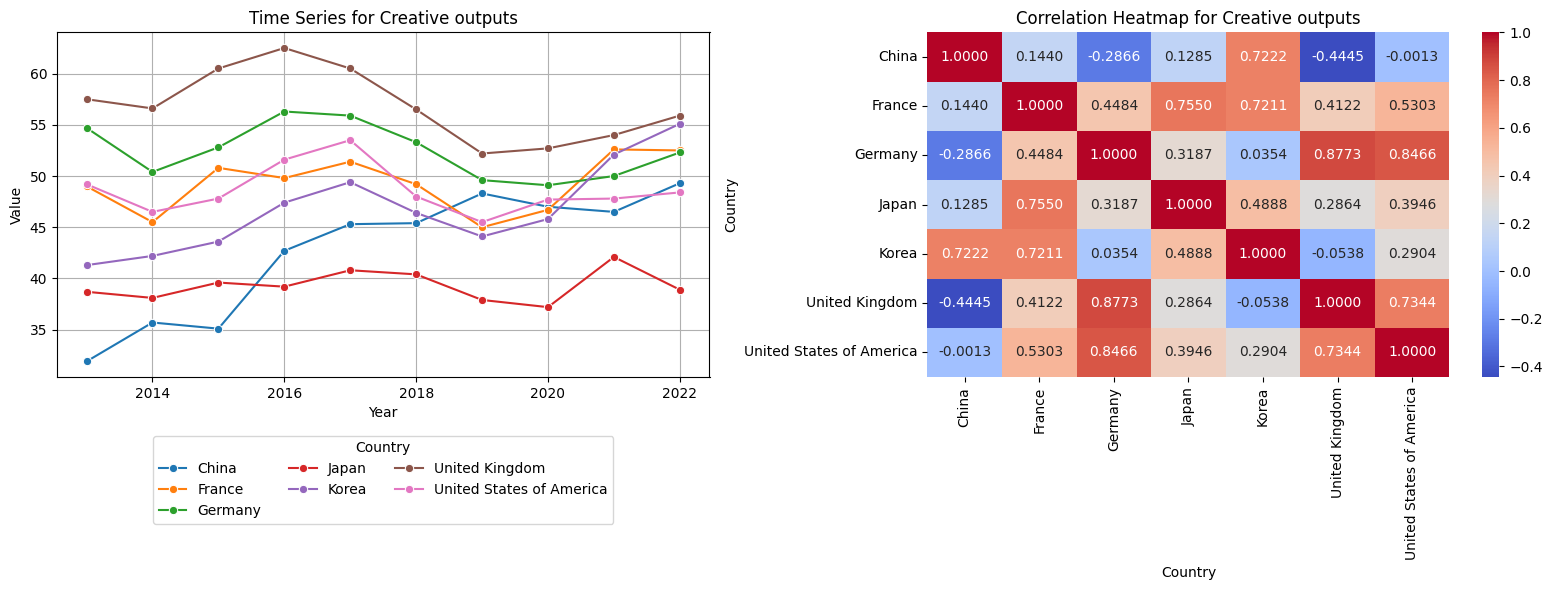

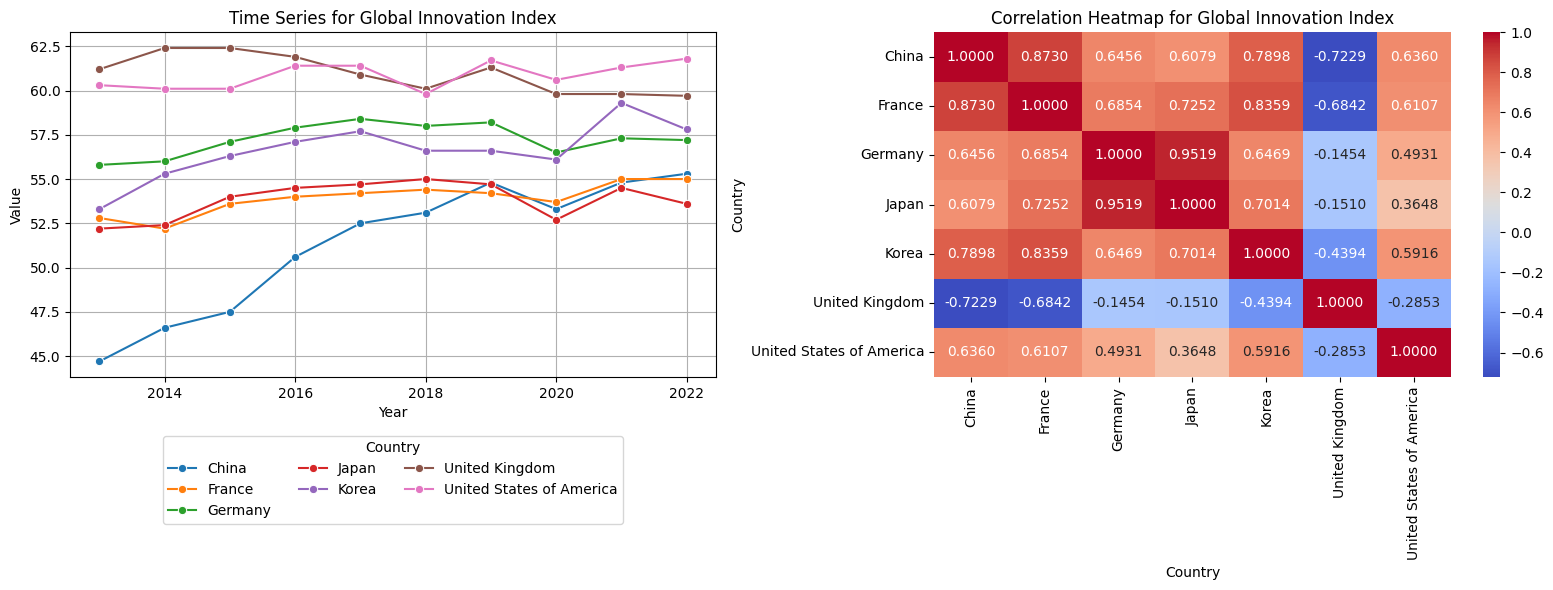

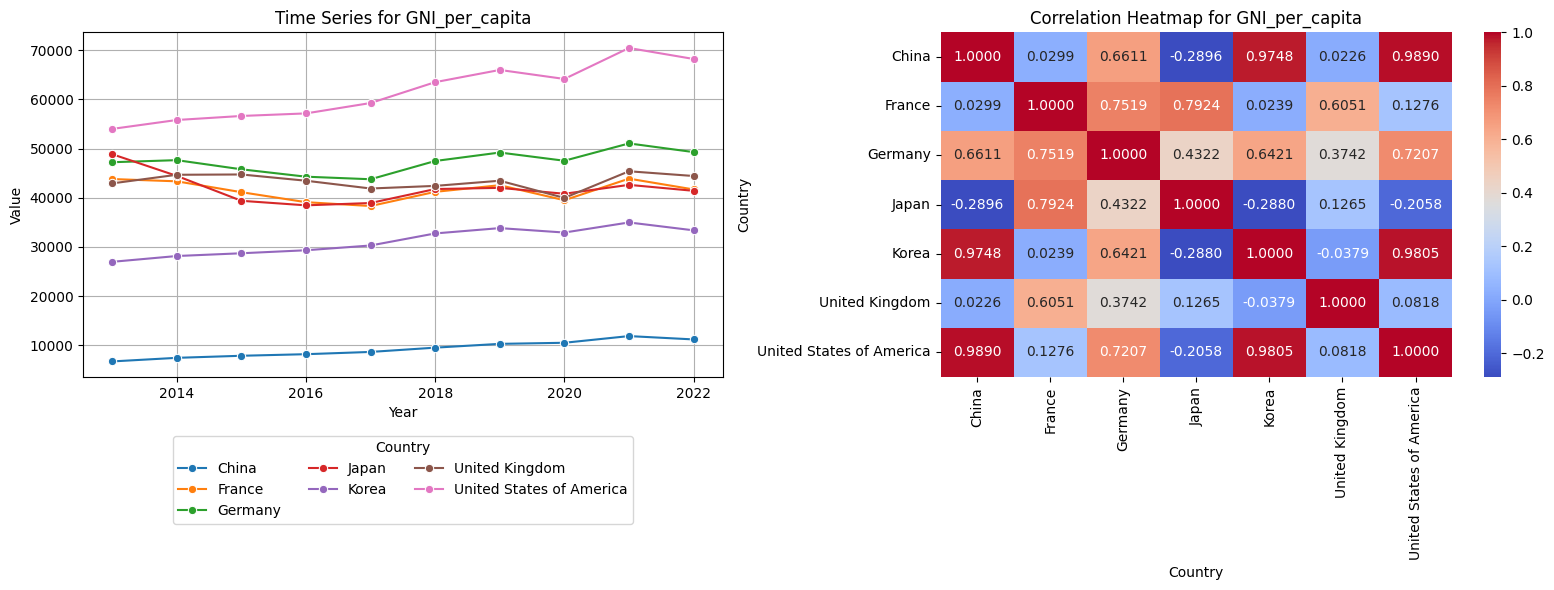

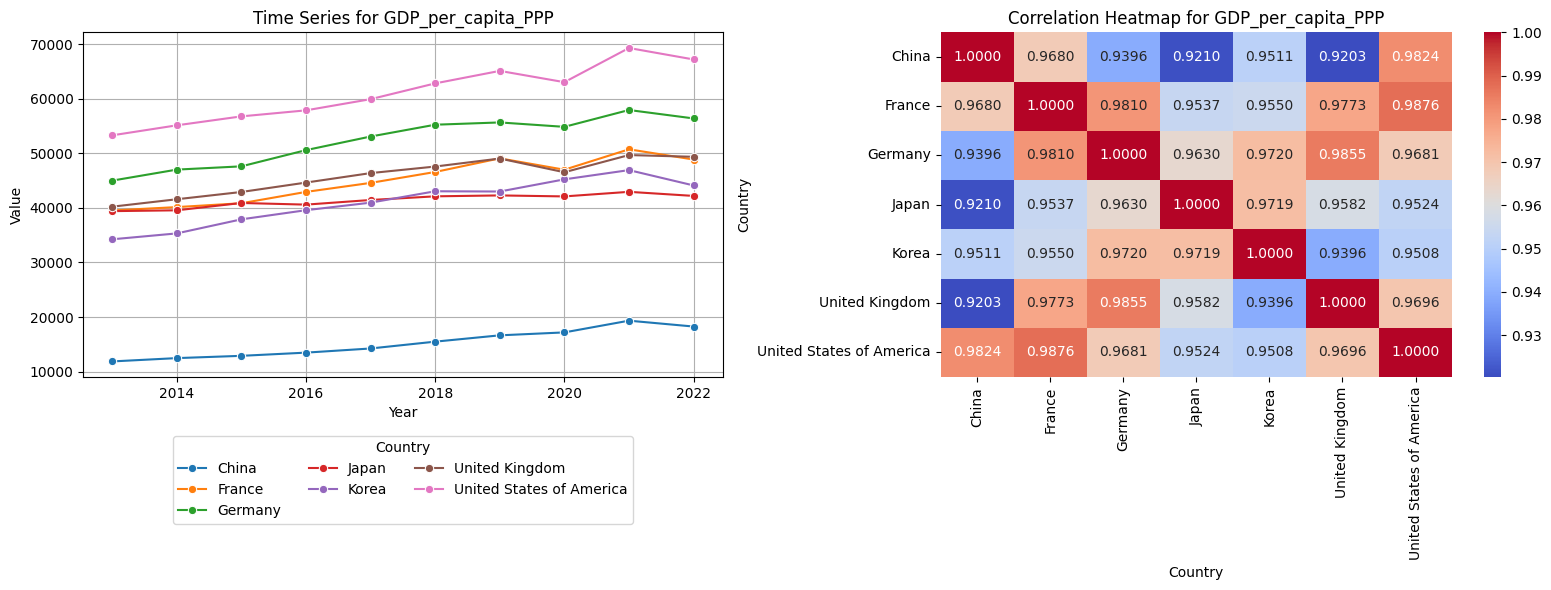

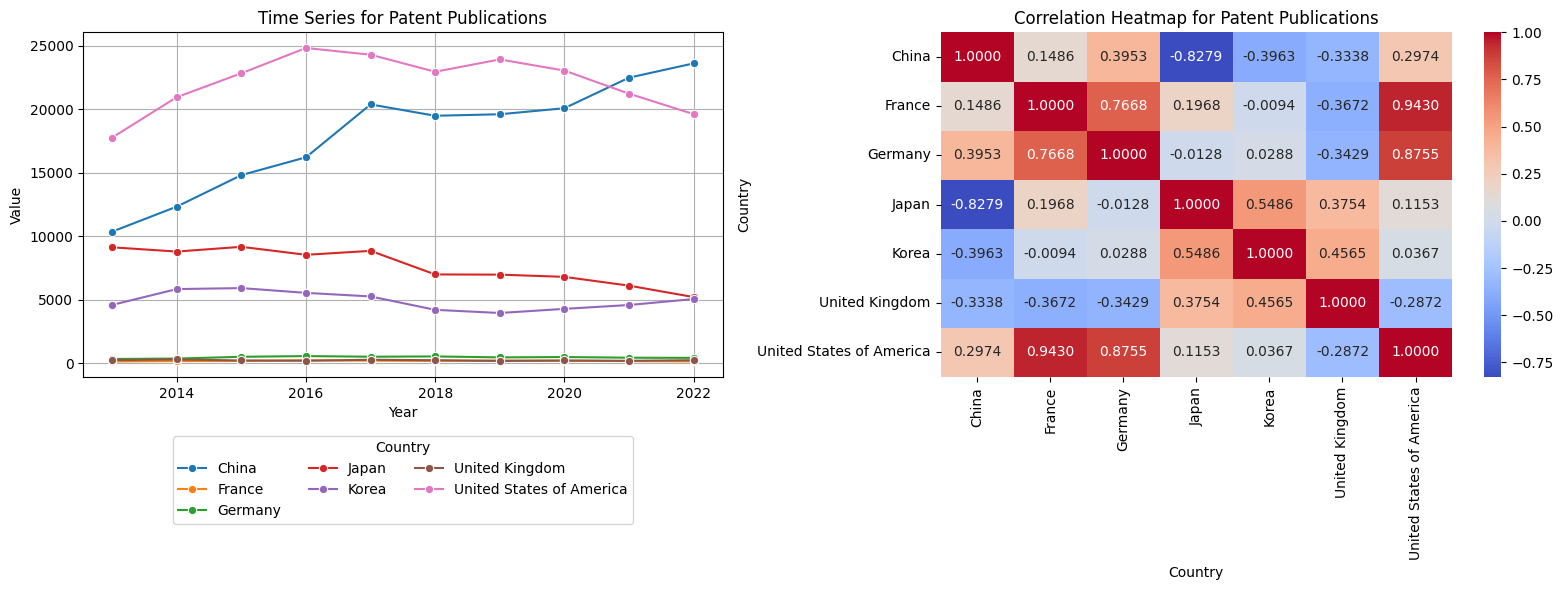

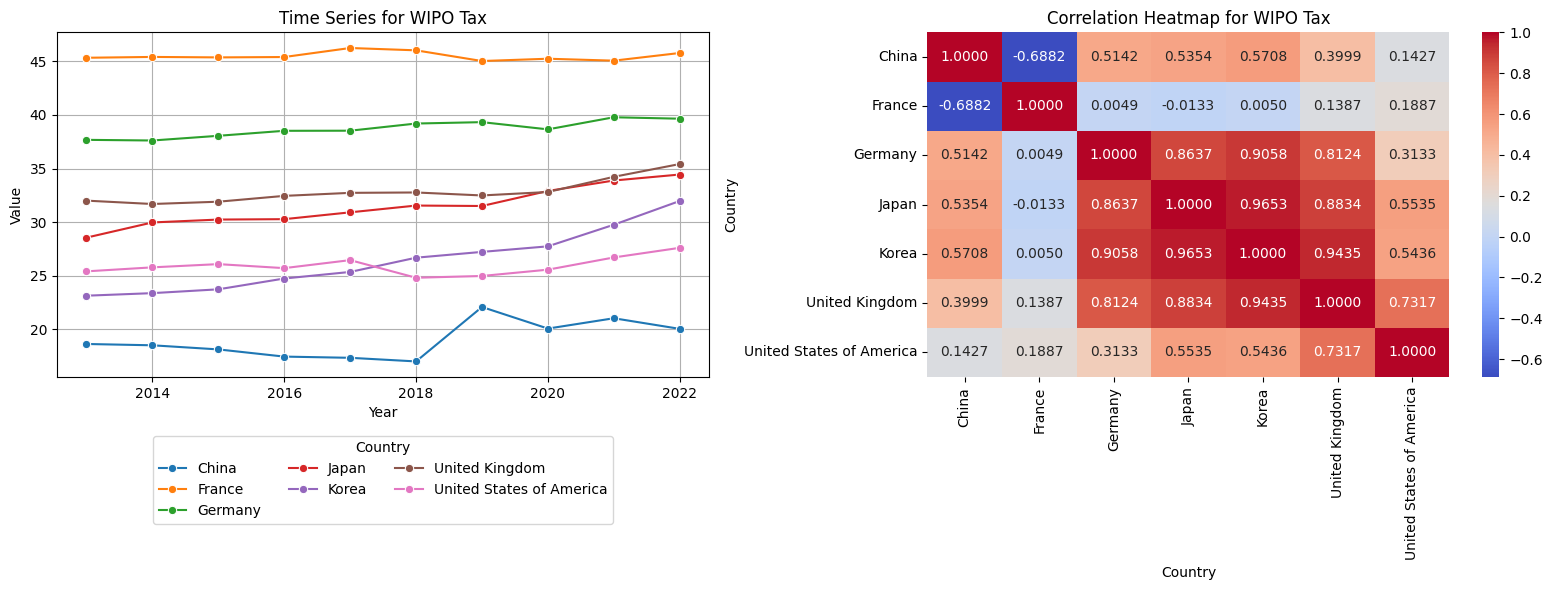

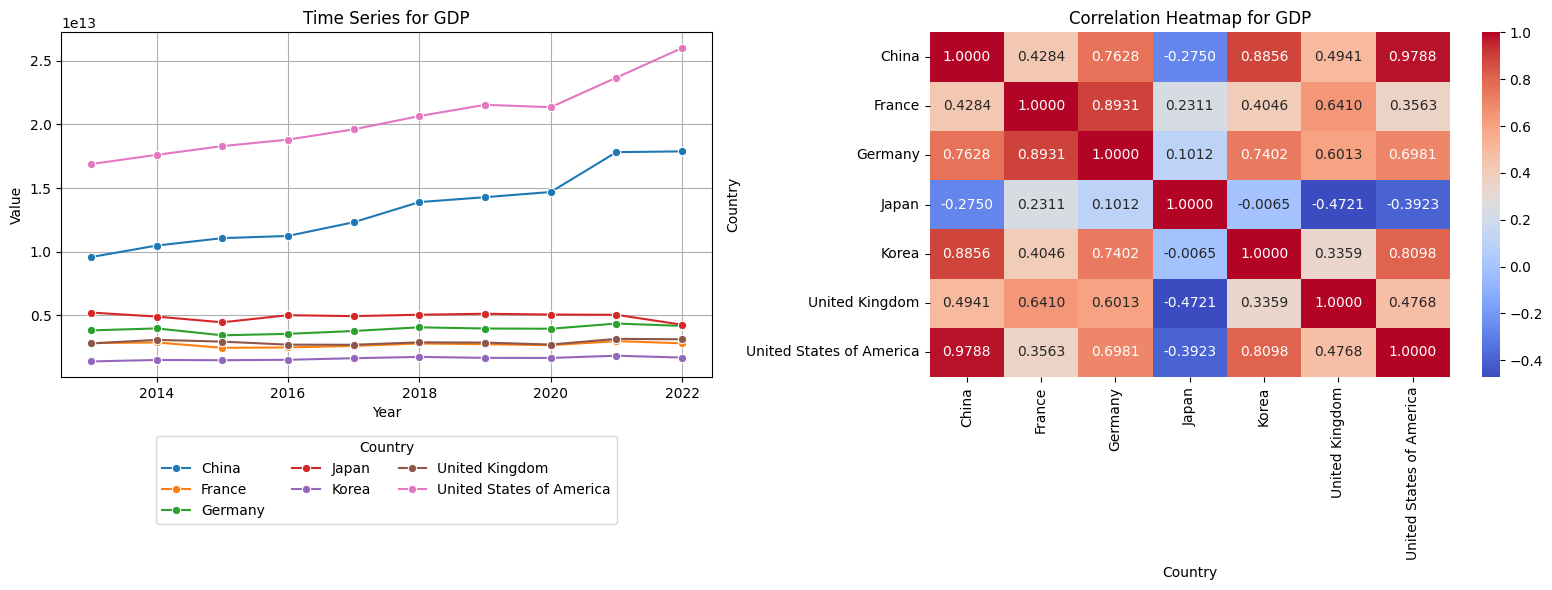

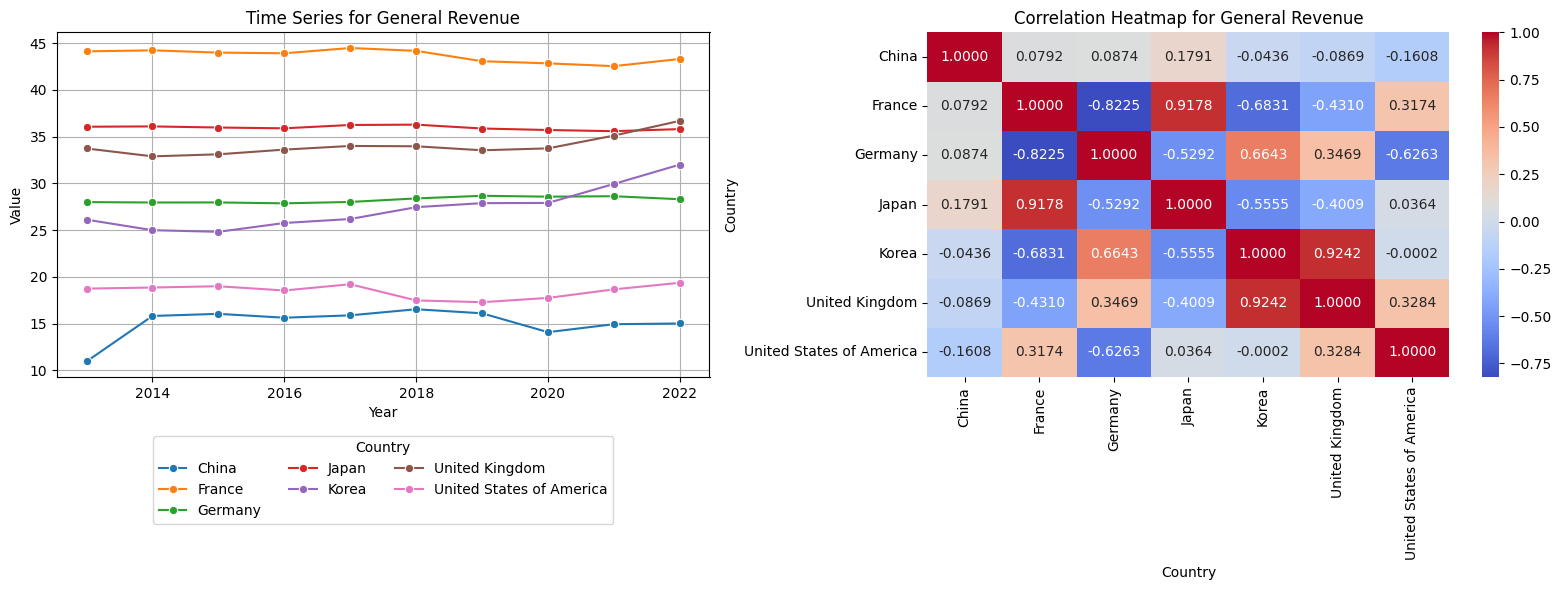

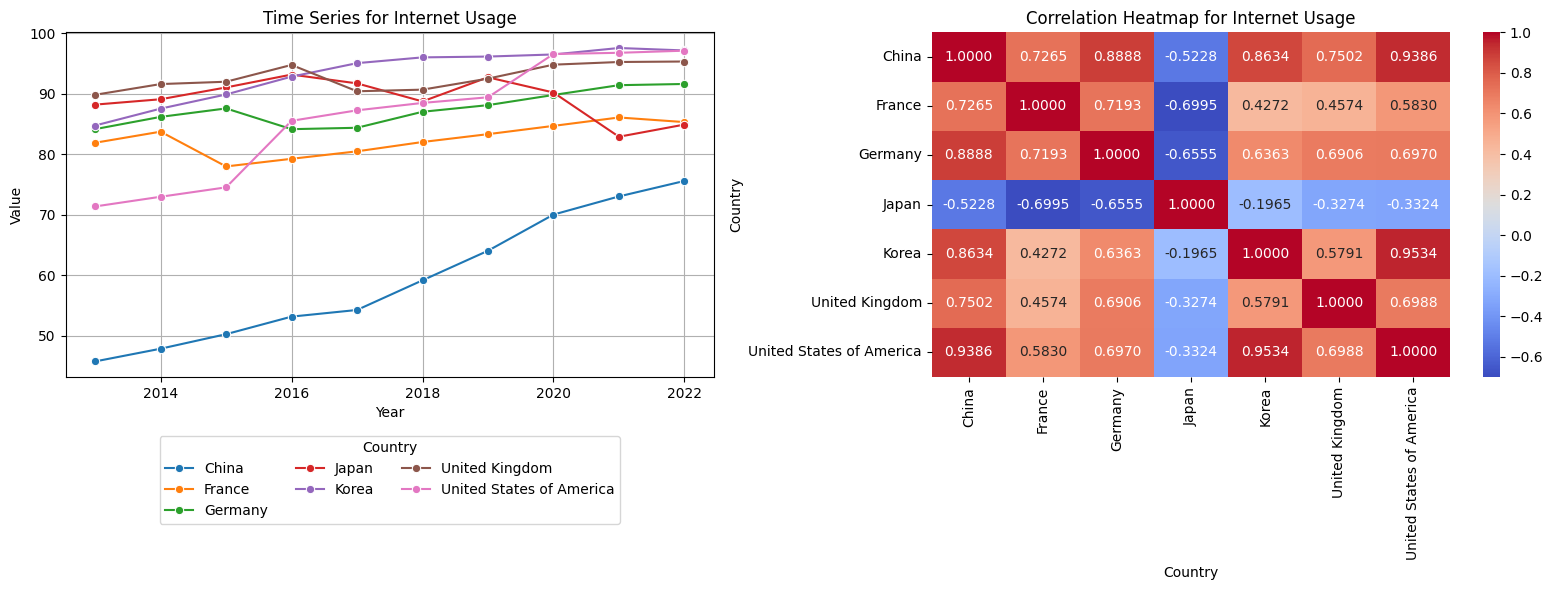

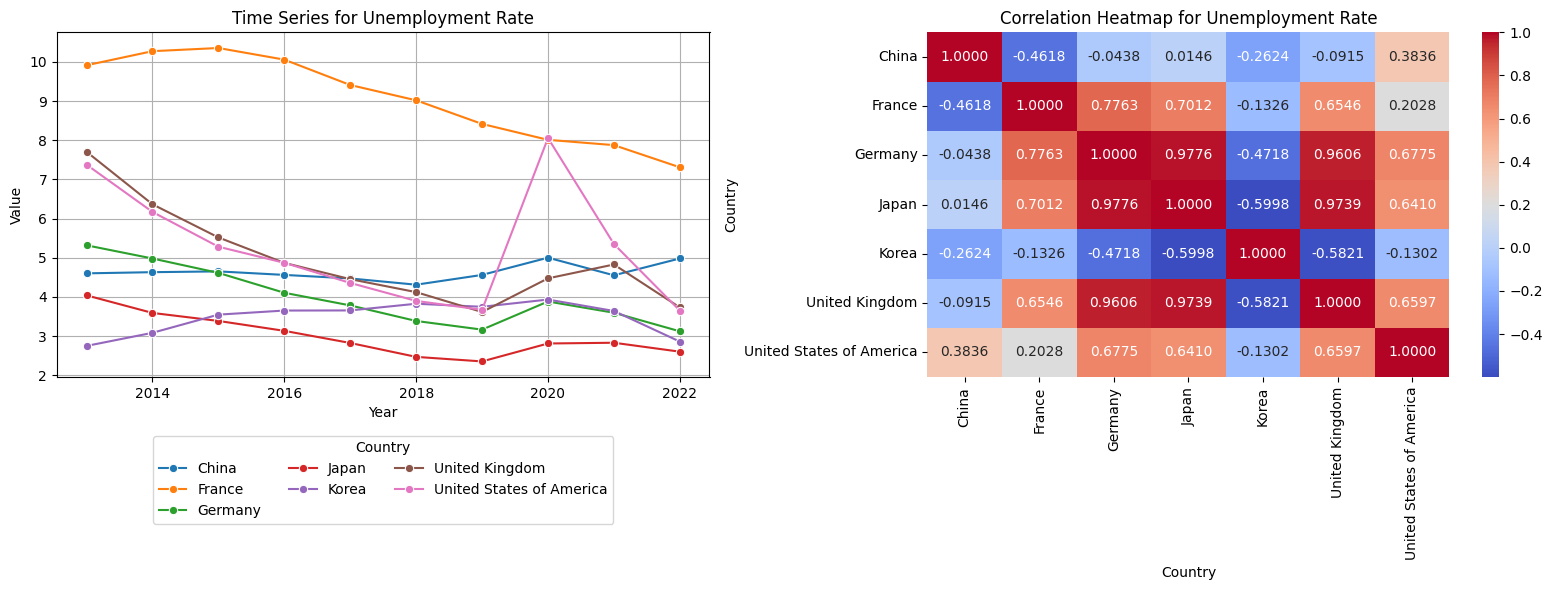

In [9]:
for cat in categories:
    # 해당 카테고리 데이터 추출
    cat_df = df[df['category'] == cat].copy()
    
    # 1) 시계열 분석용 데이터
    cat_long = cat_df.melt(
        id_vars=['Country', 'category'],
        value_vars=years,
        var_name='Year',
        value_name='Value'
    )
    cat_long['Year'] = cat_long['Year'].astype(int)
    
    # 2) 국가 간 상관관계용 데이터
    pivot_df = cat_df.set_index('Country')[years]
    corr_matrix = pivot_df.T.corr().round(4)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 왼쪽 그래프: 시계열 추이
    sns.lineplot(data=cat_long, x='Year', y='Value', hue='Country', marker='o', ax=axes[0])
    axes[0].set_title(f"Time Series for {cat}")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Value")
    axes[0].grid(True)
    
    # legend 그래프 아래 배치
    axes[0].legend(
        title='Country',
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        ncol=3
    )
    
    # 오른쪽 그래프: 상관관계 히트맵
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f", ax=axes[1])
    axes[1].set_title(f"Correlation Heatmap for {cat}")
    axes[1].set_xlabel("Country")
    axes[1].set_ylabel("Country")
    
    # 여백 조정
    plt.tight_layout()
    plt.show()